<table style="width:100%; float:center; background-color:#FFFFFF" align="left">
<tr>
<td style="text-align:left; background-color:#FFFFFF"></td>
<td style="text-align:right; background-color:#FFFFFF">
<div>
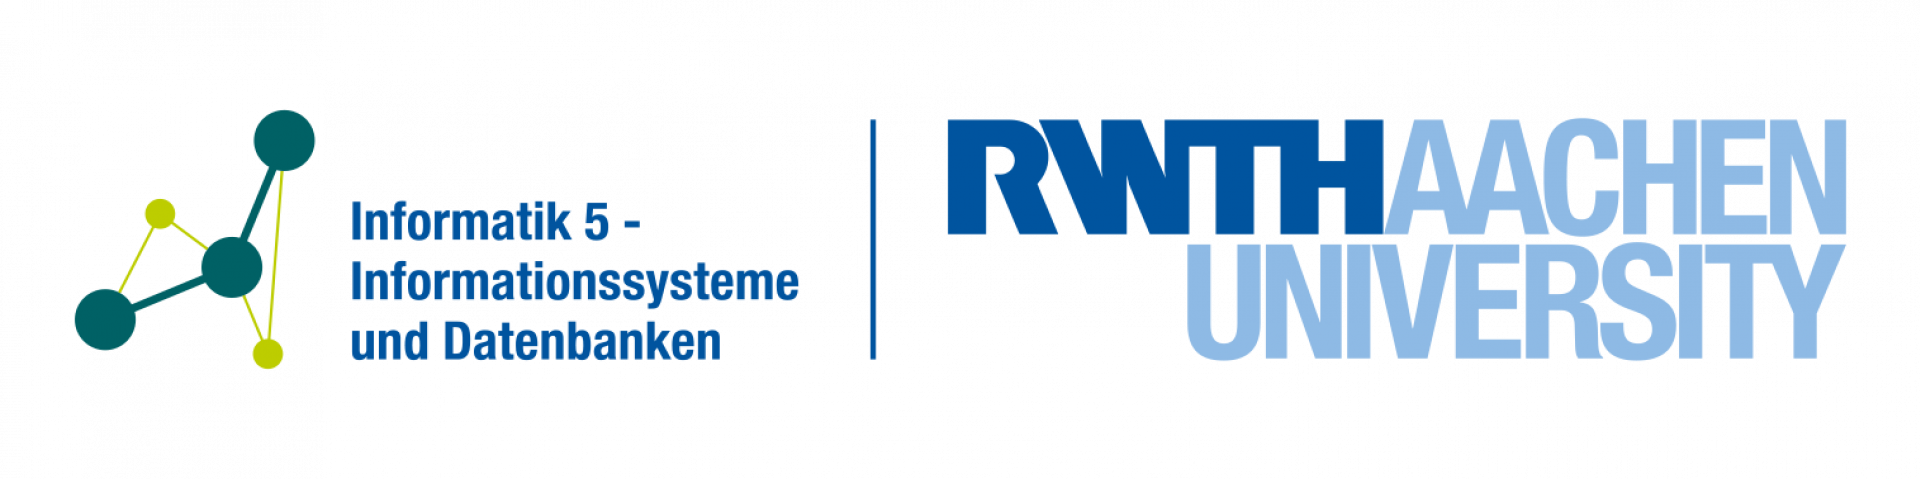
</td></tr>
</table>

<div class="pull-left">
    Dr. Christoph Lange <br>
    Lina Molinas Comet, M. Sc.
</div>

<div class="pull-right">
    <h4> 24th NOV 2022 </h4>
</div>

<center>
    <h1> Medical Data Science (Winter 2022/23) </h1>
</center>

<h3> Name and Student ID:[Replace] </h3>

# Getting Started
To start working on the exercises, first we need to set up the environment. For that, run the following two rows in which we install the necessary tools.

In [1]:
%%capture

# The line above suppresses output. If there are errors, remove it.
# Execute this cell once to install and update all needed packages. Could take a while, please wait until this process is finished before continuing.
# When the cell is finished, the [*] to the left of the cell turns into a number, e.g. [1].
import sys
!{sys.executable} -m pip install git+https://git.rwth-aachen.de/i5/teaching/jupyter-rdfify -U
# The line below installs the python graphviz interface together with the grahpviz binaries.
# If you do not use anaconda, you need to install graphviz by hand and add it to your path as well as install the graphviz
# interface with pip (pip install graphviz)
!conda install --override-channels --yes --prefix {sys.prefix} -c conda-forge python-graphviz

In [2]:
%reload_ext jupyter-rdfify

/opt/conda/lib/python3.9/site-packages/rdflib_jsonld/__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.0.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(


# Some helpful comments:

## Turtle
*Turtle* stands for **Terse RDF Triple Language** and is a [W3C recommended](https://www.w3.org/TR/turtle/) syntax and file format for serializing RDF Graphs. To serialize an RDF triple of the form *(Subject, Predicate, Object)* in Turtle, you just write them in that sequence, followed by a period. In this example you would write:

**Subject Predicate Object .**  
*(Please note the period after a triple)*

In *Turtle*, URIs are encased in angled brackets (&lt; &gt;). For instance, to indicate that the capital of Germany is Berlin, you would express it by the RDF triple *(http://example.org/#Germany, http://example.org/#hasCapital, http://example.org/#Berlin)*, which is serialized like this:

**&lt;http://example.org/#Germany&gt; &lt;http://example.org/#hasCapital&gt; &lt;http://example.org/#Berlin&gt; .**

**Considering this is a very simple syntax, we can see that Turtle is intuitive and human-readable**

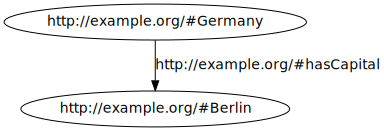

In [3]:
%%rdf turtle -l example1_fullURIS

# Graph representation of our example by using full URIs 

<http://example.org/#Germany> <http://example.org/#hasCapital> <http://example.org/#Berlin> .

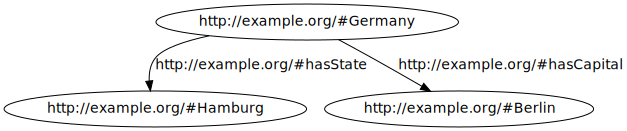

In [4]:
 %%rdf turtle -l example1_fullURIS_syntacticsugar
    
# Graph representation of our example by using full URIs and Syntactic Sugar

<http://example.org/#Germany> <http://example.org/#hasCapital> <http://example.org/#Berlin> ;  <http://example.org/#hasState> <http://example.org/#Hamburg> .

### CURIEs
When we used full URIs the graph looks cluttered and both the graph and the *Turtle* source are hard to read. But many URIs have the same prefix (http://example.org/sights for example) and turtle allows us to define abbreviations for these prefixes. These abbreviated URIs are called *Compact URIs* or *CURIES*. In Turtle, such a prefix is defined using the **@prefix** keyword, followed by the abbreviation, then the URI prefix in angled brackets (&lt; &gt;) and finally a period. For example, if we want to abbreviate *http://example.org/#* with *ex:*, then we need to prepend the following line to the turtle document:

**@prefix ex: &lt;http://example.org/#&gt; .**

Now we can abbreviate the RDF triple:

**&lt;http://example.org/#Germany&gt; &lt;http://example.org/#hasCapital&gt; &lt;http://example.org/#Berlin&gt; .**

to:

**ex:Germany ex:hasCapital ex:Berlin .**

Note, that we omit the angled brackets when using CURIEs.

### Syntactic sugar:
Because subjects or subject-predicate-combinations often repeat in the same graph, *Turtle* introduces some syntactic sugar.
To repeat a subject, one can use a semicolon instead of a period after a triple. Again, looking at our previous example, to express that the capital of Germany is Berlin and adding that it has a state called "Hamburg", one would write the following:

**&lt;http://example.org/#Germany&gt; &lt;http://example.org/#hasCapital&gt; &lt;http://example.org/#Berlin&gt; ;  
&nbsp;&nbsp;&nbsp;&lt;http://example.org/#hasState&gt; &nbsp;&lt;http://example.org/#Hamburg&gt; .**

To repeat a subject-predicate-combination, one can use a comma instead of a period after the triple. To express that Germany has two states, Hamburg and Bavaria, one would write the following:

**&lt;http://example.org/#Germany&gt; &lt;http://example.org/#hasState&gt; &lt;http://example.org/#Hamburg&gt; ,  
&nbsp;&nbsp;&nbsp;&nbsp;&lt;http://example.org/#Bavaria&gt; .**

Both of these can be chained to repeat the same subject/subject-predicate-combination over and over.

**You are allowed and even encouraged to use syntactic sugar throughout all the tasks.**

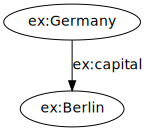

In [5]:
%%rdf turtle -l example1_abbr
@prefix ex: <http://example.org/> .

# Graph representation of our example by using CURIEs

ex:Germany ex:capital ex:Berlin .

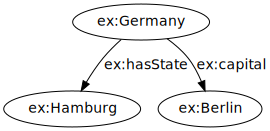

In [6]:
%%rdf turtle -l example1_abbr
@prefix ex: <http://example.org/> .

# Graph representation of our example by using CURIEs and Syntactic Sugar

ex:Germany ex:capital ex:Berlin ; ex:hasState ex:Hamburg .

### Literals

For basic values such as numbers and strings, it is impractical to use URIs. Instead of URIs we use literals. Literals have a datatype, which is string by default. Literals can only be used in the object position of triples and are encased in double quotes (" "). An example for a triple with a string literal is:

**ex:Germany ex:name "Deutschland" .**

To specify a *datatype*, it is appended to the literal with *two carets* (^^). A datatype can be an arbitrary URI, but there are some predefined datatypes which should suffice in most cases. These predefined datatypes use the prefix *http://www.w3.org/2001/XMLSchema#*, which is usually abbreviated with *xsd:*. An example for an integer literal:

**ex:Germany ex:population "83042235"^^xsd:int .**

There are also string literals with a specified language. This is useful for names that differ in different languages. To specify a language, we append a two character language tag with an at symbol (@) behind the literal. The literal is then automatically interpreted as a language tagged string (this datatype is never specified explicitly). To express that ex:germany has a different name in english and in german, one would add two triples:

**ex:Germany ex:name "Deutschland"@de .**  
**ex:Germany ex:name "Germany"@en .**  

Please note that the URI ex:Germany is **not** the same as the literal "Germany" and in some cases you can't deduce the name of an entity from the URI (for example www.wikidata.org uses numerical IDs, e.g https://www.wikidata.org/entity/Q1017).

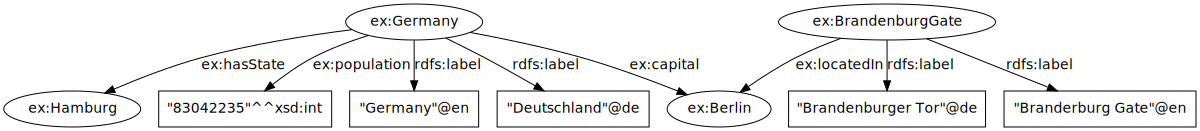

In [7]:
%%rdf turtle -l example1_abbr
@prefix ex: <http://example.org/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

# Graph representation of our example by using CURIEs

ex:Germany rdfs:label "Deutschland"@de .
ex:Germany rdfs:label "Germany"@en .
ex:Germany ex:population "83042235"^^xsd:int .

# adding some facts from previous examples
ex:Germany ex:capital ex:Berlin ; ex:hasState ex:Hamburg .

# adding some new facts
ex:BrandenburgGate ex:locatedIn ex:Berlin .
ex:BrandenburgGate rdfs:label "Branderburg Gate"@en .
ex:BrandenburgGate rdfs:label "Brandenburger Tor"@de .

### Blank Nodes

Sometimes resources do not or should not have an identifier but still stand in relation to other resources. These anonymous resources are represented by blank nodes in RDF graphs. In *Turtle*, blank nodes are are represented with an underscore followed by a colon and an identifier (\_:identifier). The purpose of the identifier is to be able to locally reference the anonymous resource multiple times. Even if two blank nodes in different graphs use the same identifier, they usually reference a different resource. For example, when you want to express that you know someone who is a doctor but doesn't have an identifier and there is someone else you don't know who is also a doctor, you do it like this:

**ex:me ex:knows \_:1 .  
\_:1 rdf:type ex:doctor .  
\_:2 rdf:type ex:doctor .**

You know \_:1 but don't know \_:2 but they are both doctors.

Additionally, blank nodes are often used to represent n-ary relations. For example, a prescription that needs to have the name of the drug which is prescribed and a prescriber can be expressed like this:

**ex:patient ex:getsPrescription \_:1 .  
\_:1 ex:drugName "Dexamethasone" .  
\_:1 ex:prescriber ex:doctor .**

**Syntactic sugar:**  
To make this more readable, you can instead use square brackets (\[ \]) and every predicate-object-combination in between the square brackets will reference the same blank node. The grade example would then look like this:

**ex:patient ex:getsPrescription \[  
&nbsp;&nbsp;&nbsp;&nbsp;ex:grade "Dexamethasone" ;  
&nbsp;&nbsp;&nbsp;&nbsp;ex:prescriber ex:doctor  
\] .**

Note that we must use semicolons and commas in between the brackets (see syntactic sugar at top of assignment) and there is still a period after the brackets.

Also Note that the blank node identifier is exchangable as long as we use the same one when referencing the same node. That is why the bracket notation does not need an identifier.

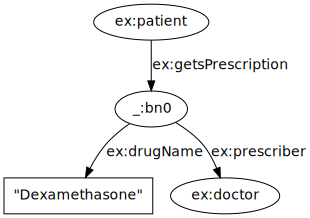

In [8]:
%%rdf turtle -l example_blanknodes
@prefix ex: <http://example.org/> .

# Graph representation of the example using blank nodes

ex:patient ex:getsPrescription _:1 .  
_:1 ex:drugName "Dexamethasone" .  
_:1 ex:prescriber ex:doctor .

# Task 0 - Warm Up Exercise

The task here is to create an RDF graph about the "Master of Science in Medical Data Science" program using Turtle. The graph must contain the following information about the students, lectures, courses, and location:

* There are three students (A,B,C) studying the master program "Master of Science in Medical Data Science".
* There are two lecturers (X,Y) giving lectures in the above mentioned program.

* In this program, there are two courses (C1,C2), meaning that each course is part of the master program "Master of Science in Medical Data Science".

* Lecturer X teaches C2 and Lecturer Y teaches C1.

* The lectures of this program take place at the "RWTH Aachen Academy".


**Use the following URIs:**

* Student A: http://example.org/student#StudentA
* Student B: http://example.org/student#StudentB
* Student C: http://example.org/student#StudentC
* study: http://example.org/properties#study
* Master Program MDS: http://example.org/master#MDS
* Lecturer X: http://example.org/lecturer#LecturerX
* Lecturer Y: http://example.org/lecturer#LecturerY
* Course 1: http://example.org/course#C1
* Course 2: http://example.org/course#C2
* is part of: http://example.org/properties#isPartOf
* teaches: http://example.org/properties#teaches
* takes place at: http://example.org/properties#takesPlaceAt
* RWTH Aachen Academy: http://example.org/classes#RWTHAcademy

In [12]:
%%rdf turtle -l masterprogram
### BEGIN SOLUTION


### END SOLUTION

# Task 1 - My first patient graph

The task is to create an RDF graph about patients using Turtle. The graph must contain the following information about the patients and their symptoms: 

* 1a) There are two patients (A,B) admitted to the hospital with the label "Uniklinik Aachen".
* 1b) The Uniklinik Aachen is a well known hospital located in Aachen.

* 1c) The nationality of Patient A is "German", while Patient B has the nationality "Dutch".

* 1d) Patient A is admitted at "9" and Patient B is admitted at "11".

* 1e) Patient A is 21 years and Patient B is 34 years old.

* 1f) Patient A has the following symptoms: Fatigue, Fever, Headache.

* 1g) Patient B has the symptom: Upper abdominal pain, Nausea.

* 1h) Patient A has a blood sugar level of "10.35" (mmol/l), while the blood sugar level of Patient B is "6.4" (mmol/l)

* 1i) The initial diagnose for Patient A is: Influenza.

* 1j) Patient B has the initial diagnose: Gastritis.


**Use the following URIs:**

* PatientA: http://example.org/person#PatientA
* PatientB: http://example.org/person#PatientB
* admittedTo: http://example.org/properties#admittedTo

* Nationality: http://example.org/properties#nationality

* Hospital: http://example.org/location#Hospital
* Label: http://www.w3.org/2000/01/rdf-schema#label
* LocatedIn: http://example.org/properties#locatedIn
* Aachen: http://example.org/location#Aachen

* admittedAt: http://example.org/properties#admittedAt
* Age: http://example.org/properties#age
* hasSymptom: http://example.org/properties#hasSymptom

* hasBloodSugarLevel: http://example.org/properties#hasBloodSugarLevel

* Fatigue: http://example.org/symptom#Fatigue
* Fever: http://example.org/symptom#Fever
* Headache: http://example.org/symptom#Headache
* UpperAbdominalPain: http://example.org/symptom#UpperAbdominalPain
* Nausea: http://example.org/symptom#Nausea

* hasInitialDiagnose: http://example.org/disease#hasInitialDiagnose
* Influenza: http://example.org/disease#Influenza
* Gastritis: http://example.org/disease#Gastritis

In [ ]:
 %%rdf turtle -l patients_fullURIs
### BEGIN SOLUTION





### END SOLUTION

# Task  2 - CURIEs

Create the same RDF graph as in 1. 
But use CURIEs and introduce the following abbreviations:

Abbreviate http://example.org/person# to person:

Abbreviate http://example.org/location# to lo:

Abbreviate http://example.org/properties# to pr:

Abbreviate http://example.org/classes# to cl:

Abbreviate http://example.org/classes/symptom# to st:

Abbreviate http://example.org/classes/disease# to ds:

Abbreviate http://www.w3.org/2000/01/rdf-schema# to rdfs: 

In [ ]:
%%rdf turtle -l patients_abbr

#example first prefix
@prefix person: <http://example.org/person#> .

### BEGIN SOLUTION





### END SOLUTION

# Task  3 - Syntactic Sugar

Create the same RDF graph as in 2. But use syntactic sugar *Hint*: think on merging several of the facts about the same subject.

In [ ]:
%%rdf turtle -l patients_abbr_synt

#example first prefix
@prefix person: <http://example.org/person#> .

### BEGIN SOLUTION





### END SOLUTION

# Task  4 - Literale

The task is to create an RDF graph, which has more precise Literals. Use type definitions and language tags for the strings.
Additionally, include the information that PatientA speaks "Deutsch" and PatientB speaks "Nederlands".
*Hint*: *speaks* is a property

## Language Tags:

@de for German, @nl for Dutch, @en for English

## Types:
Only use the datatypes xsd:string, xsd:int and xsd:float, @de for German, @nl for Dutch

In [ ]:
%%rdf turtle -l literals

#example first prefix
@prefix person: <http://example.org/person#> .

### BEGIN SOLUTION




### END SOLUTION

# Task 5 - SPARQL

SPARQL stands for **S**PARQL **P**rotocol **A**nd **R**DF **Q**uery **L**anguage and is a [W3C recommended](https://www.w3.org/TR/sparql11-overview/) language for querying and manipulating RDF graph content. As its syntax is similar Turtle, we will first look at an example:

**PREFIX ex: http://example.org/#<br>   
SELECT ?countryName ?capitalName  
WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;ex:Germany ex:name ?countryName .  
&nbsp;&nbsp;&nbsp;&nbsp;ex:Germany ex:capital ?capital .  
&nbsp;&nbsp;&nbsp;&nbsp;?capital ex:name ?capitalName  
}**

The following information was extracted from the [W3C SPARQL Query Language Specification](https://www.w3.org/TR/2013/REC-sparql11-query-20130321/). If you have any questions regarding SPARQL please first consult this document.

## Prefixes
As in Turtle, we can define *prefixes* to make our query more human-readable. In SPARQL, prefix declarations start with the keyword **PREFIX** and are then followed by the desired abbreviation and then the IRI to abbreviate. This syntax also works in turtle but note that there is *no period* at the end of the line (in contrary to the *@prefix* syntax which only works in Turtle). In the example above, we abbreviate the URI http://example.org/# to *ex:*.


## Queries
After all our prefix declarations, the query starts. First we need to specify a *query type*. SPARQL defines four query types which all match a given graph pattern against an RDF graph but differ in what they return:
- **SELECT:** Queries return the variable bindings of user-specified variables which satisfy the given graph pattern.
- **ASK:** Queries return a boolean result based on whether the given graph pattern could be matched against the RDF graph or not.
- **CONSTRUCT:** Queries return a new graph which is constructed from a template and the variable bindings which satisfy the given graph pattern.
- **DESCRIBE:** Queries return an RDF graph which describes the resource based on what the query service deems important (different query services can yield different results for the same graph).

In our example above, we use a SELECT query. The graph pattern follows after the keyword **WHERE** and is surrounded by braces ({}).
## Basic Graph Patterns
We use so-called **Graph Patterns** to query an RDF graph. *Basic Graph Patterns* look very similar to Turtle as they use the same triple syntax. The only difference is that in Graph Patterns, we can also use variables at every position where an IRI can be used. Variables always start with a question mark and need an identifier. The graph pattern in our example (after the WHERE keyword) features three variables - namely ?countryName, ?capital and ?capitalName - in three triples. When matching a Graph Pattern against an RDF graph, the query service searches for variables bindings such that the Graph Pattern matches a part of the queried graph. When a variable occurs more than once in a pattern, both occurences have to be bound to the same value in a match. Also note that the period at the end of a line represents a conjuction (AND), which is why we the last period of a Graph Pattern is optional. There are also more complex Graph Patterns called Group Graph Patterns, which we will cover later on.

## Parameters
The four query types take different parameters:  
- **SELECT:** A set of variables delimited by spaces, on which the variable bindings should be projected. In our example we use the three variables ?capital, ?capitalName and ?countryName but we only want the last two to appear in our results, thus we specify ?capitalName and ?countryName after the SELECT keyword. If you want to project all variables, you can use an asterisk (\*) at this position.
- **ASK:** No parameters except for the graph pattern to match the RDF graph against.
- **CONSTRUCT:** A Basic Graph Pattern as a template and a Graph Pattern for matching. The variable bindings resulting from matching the Graph Pattern against the RDF graph are then used to construct a new graph based on the template. When no template is given, the Graph Pattern used for matching is also used as the template but then only Basic Graph Patterns are allowed.
- **DESCRIBE:** A set of variables and IRIs delimited by space which should be described by the resulting graph. One can also provide a Graph Pattern to identify resources or give constraints.

## FROM Statement
One can also use a FROM or a FROM NAMED statement to specify a dataset which should be queried. With this multiple graphs can be queried and/or merged. This won't be needed in this exercise but if you're interested you can [read about it](https://www.w3.org/TR/sparql11-query/#specifyingDataset).

## Syntactic Sugar
All the syntactic sugar from Turtle can also be used in SPARQL Graph Patterns!

## Graph: The Big Bang Theory
The RDF graph below contains some information about the friends and family relations in the famous series "The Big Bang Theory".
**You must run the following cell or the graph won't be in scope for following tasks.**

In [ ]:
%%rdf turtle -l bigbangtheory
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX s: <http://example.org/subjects#>
PREFIX p: <http://example.org/properties#>
PREFIX c: <http://example.org/classes#>

s:Constance a c:FictionalCharacter, c:Female ;
    rdfs:label "Constance Trucker" ;
    p:nickname "Meemaw" .
s:Mary a c:FictionalCharacter, c:Female ;
    p:spouse s:George ;
    rdfs:label "Mary Cooper" ;
    p:parent s:Constance .
s:George a c:FictionalCharacter, c:Male ;
    p:spouse s:Mary ;
    rdfs:label "George Cooper" .
s:Sheldon a c:FictionalCharacter, c:Male ;
    p:spouse s:Amy ;
    p:parent s:George ;
    p:parent s:Mary ;
    p:sibling s:GeorgeJr ;
    p:sibling s:Melissa ;
    p:friend s:Leonard ;
    p:friend s:Howard ;
    p:friend s:Rajesh ;
    p:friend s:Penny ;
    p:friend s:Bernadette ;
    rdfs:label "Sheldon Cooper" ;
    p:nickname "Shelly" ;
    p:nickname "Moon Pie" .
s:GeorgeJr a c:FictionalCharacter, c:Male ;
    p:parent s:George ;
    p:parent s:Mary;
    p:sibling s:Sheldon ;
    p:sibling s:Melissa ;
    rdfs:label "George Cooper, Jr." ;
    p:nickname "Georgie" .
s:Melissa a c:FictionalCharacter, c:Female ;
    p:parent s:Mary ;
    p:parent s:George ;
    p:sibling s:Sheldon ;
    p:sibling s:GeorgeJr ;
    rdfs:label "Melissa Cooper" ;
    p:nickname "Missy" .
s:Leonard a c:FictionalCharacter, c:Male ;
    p:friend s:Sheldon ;
    p:friend s:Howard ;
    p:friend s:Rajesh ;
    p:friend s:Benadette ;
    p:friend s:Amy ;
    p:spouse s:Penny ;
    p:parent s:Beverly ;
    p:parent s:Alfred ;
    rdfs:label "Leonard Hofstadter" ;
    p:nickname "Lenny" .
s:Howard a c:FictionalCharacter, c:Male ;
    p:friend s:Leonard ;
    p:friend s:Penny ;
    p:friend s:Sheldon ;
    p:friend s:Amy ;
    p:friend s:Rajesh ;
    p:spouse s:Benadette ;
    rdfs:label "Howard Wolowitz" ;
    p:nickname "Howie" .
s:Rajesh a c:FictionalCharacter, c:Male ;
    p:friend s:Leonard ;
    p:friend s:Penny ;
    p:friend s:Sheldon ;
    p:friend s:Howard ;
    p:friend s:Rajesh ;
    p:friend s:Benadette ;
    p:friend s:Amy ;
    rdfs:label "Rajesh Koothrappali" ;
    p:nickname "Raj" .
s:Amy a c:FictionalCharacter, c:Female ;
    p:spouse s:Sheldon ;
    p:friend s:Leonard ;
    p:friend s:Penny ;
    p:friend s:Sheldon ;
    p:friend s:Howard ;
    p:friend s:Rajesh ;
    p:friend s:Benadette ;
    p:friend s:Rajesh ;
    rdfs:label "Amy Farrah Fowler" ;
    p:nickname "Ames" .
s:Penny a c:FictionalCharacter, c:Female ;
    p:spouse s:Sheldon ;
    p:friend s:Leonard ;
    p:friend s:Amy ;
    p:friend s:Sheldon ;
    p:friend s:Howard ;
    p:friend s:Rajesh ;
    p:friend s:Benadette ;
    p:friend s:Rajesh ;
    rdfs:label "Penelope Teller" ;
    p:nickname "Penny" .
s:Alfred a c:FictionalCharacter, c:Male ;
    p:spouse s:Beverly ;
    rdfs:label "Alfred Hofstadter" .
s:Beverly a c:FictionalCharacter, c:Female ;
    p:spouse s:Alfred ;
    rdfs:label "Beverly Hofstadter" .

The Cell below will define some prefixes which can be used throughout the whole exercise notebook. You do not need to define them yourself and can just use them. You need to run the cell or you won't be able to use them.

In [ ]:
%%rdf sparql --prefix
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX s: <http://example.org/subjects#>
PREFIX p: <http://example.org/properties#>
PREFIX c: <http://example.org/classes#>

# Basic Queries
Formulate the following questions as SPARQL queries using simple SELECT queries, variables and Basic Graph Patterns. You can use as many variables as you need but the answer to the question must be bound to the variable **?result**. For example, if the question is "What is the name of germany?", the solution would be:

**SELECT ?result  
WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;ex:Germany rdfs:label ?result  
}**

Please note the difference between a resource (an IRI) and the name of a resource (a human readable literal often assigned with the predicate *rdfs:label*). Read the question carefully and try to recognize whether we are asking for an entity (e.g. Who is xy?) or for the name of an entity (e.g. What is xy's name?).

**This task refers to the graph about the friends and family relationships in the series "The Big Bang Theory". Assume a closed world (information that isn't explicitly stated is false).**

## a) 
Who are Sheldon Cooper's parents?

In [ ]:
%%rdf sparql -l bigbangtheory -s 1a
### BEGIN SOLUTION



### END SOLUTION

## b)
Whose mother is Mary Cooper? Hint: A query can result in multiple bindings

In [ ]:
%%rdf sparql -l bigbangtheory -s 1b
### BEGIN SOLUTION


### END SOLUTION

## c)
How is Sheldon Cooper related to Amy Farrah Fowler? Hint: Variables can also be used at predicate positions.

In [ ]:
%%rdf sparql -l bigbangtheory -s 1c
### BEGIN SOLUTION


### END SOLUTION

# Constructing Queries
Formulate the following questions as SPARQL queries. You can use as many variables as you need but the answer to the question must be bound to the variable **?result**. Again, please note that the URI/IRI of a resource is not the same as the literal name of that resource.

**This task refers to the previously presented graph about the family and friends relations in the series The Big Bang Theory. Assume a closed world (information that isn't explicitly stated is false).**

## a) 
Who is called "George Cooper, Jr."? Hint: Basic Graph Patterns can also match literals for equality.

In [ ]:
%%rdf sparql -l bigbangtheory -s 2a
### BEGIN SOLUTION


### END SOLUTION

## b)
What are the names of all fictional characters?

In [ ]:
%%rdf sparql -l bigbangtheory -s 2b
### BEGIN SOLUTION


### END SOLUTION

## c)
What are the names of all fathers?  
Do **not** use the DISTINCT keyword.  
Note: This query will yield the same binding for the result multiple times. Think about why that is. If you can't think of a reason try projecting the other variables as well.

In [ ]:
%%rdf sparql -l bigbangtheory -s 2c
### BEGIN SOLUTION




### END SOLUTION

## d)
Who are friends with each other?  
Do **not** use the DISTINCT keyword.  
Note: This query will yield the same binding for ?result multiple times. Think about why that is. If you can't think of a reason try projecting the other variables as well.

In [ ]:
%%rdf sparql -l bigbangtheory -s 2d
### BEGIN SOLUTION


### END SOLUTION

## e)
Who have nicknames?  
Provide the answer by indicating the name and the nickname of each person. Some people can have more than one nickname.

In [ ]:
%%rdf sparql -l bigbangtheory -s 2e
### BEGIN SOLUTION



### END SOLUTION

## Solution Modifiers
SPARQL provides many ways to modify the result of a query. These are all applied after pattern matching and in the sequence that they are introduced here.

### ORDER BY

**SELECT ?employee WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;?employee a c:Employee .  
&nbsp;&nbsp;&nbsp;&nbsp;?employee p:income ?income  
}<br>
ORDER BY DESC(?income)**

The **ORDER BY** modifier can be used to sort the bindings by a specific variable. The example above sorts all employees descending by income. To sort ascending instead, either use **ASC** instead of **DESC** or just omit DESC as ASC is the default. When using no ORDER BY, the results are in no specific sequence and may vary from service to service.

### DISTINCT

**SELECT DISTINCT ?parent WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;?parent p:child ?child .  
}**

The **DISTINCT** modifier can be used to eliminate duplicate bindings. The example above shows all parents with at least one child but it shows all parents only once, even if they have multiple children. This could have been used in 2c). Note that DISTINCT only looks at projected variables.

### OFFSET

**SELECT ?employee WHERE {
&nbsp;&nbsp;&nbsp;&nbsp;?employee a c:Employee .  
}<br>
OFFSET 3**

The **OFFSET** modifier skips the first n>=0 results. The example above shows all employees but skips the first 3. OFFSET does nothing for n=0. OFFSET is often combined with ORDER BY and LIMIT to give predictable results (e.g. skip the 3 employees with the highest income).

### LIMIT

**SELECT ?employee WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;?employee a c:Employee .  
}<br>
LIMIT 3**

The **LIMIT** modifier specifies an upper bound n>=0 to the number of solutions returned. The example above shows only the first three employees. For n=0 no results will be returned. LIMIT is often combined with ORDER BY and LIMIT to give predictable results (e.g. only show the 3 employees with the highest income).


### FILTER

**SELECT ?employee WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;?employee a c:Employee .  
&nbsp;&nbsp;&nbsp;&nbsp;?employee p:income ?income .
</br>&nbsp;&nbsp;&nbsp;&nbsp;FILTER(p:income >= "2000") .
</br>}**

The **FILTER(condition)** modifier helps to filter the results of an SPARQL query. Only the results for which the condition one specifies inside the parentheses is true will be returned as the result of the query.

### FILTER NOT EXISTS

**SELECT ?employee WHERE {  
&nbsp;&nbsp;&nbsp;&nbsp;?employee a c:Employee .  
&nbsp;&nbsp;&nbsp;&nbsp;?employee p:income ?income .
</br>&nbsp;&nbsp;&nbsp;&nbsp; FILTER NOT EXISTS{(p:income > "5000")} .
}**

The **FILTER NOT EXISTS{(condition)}** modifier also helps to filter the results of an SPARQL query. However, in this case, only the results for which the condition one specifies inside the parentheses is false will be returned as the result of the query. In other words, the results fulfilling the condition inside the parentheses will be excluded.




## Graph: Scientists
The following graph contains information about some well-known scientists.  
**You must run the following cell or the graph won't be in scope for following tasks.**

In [ ]:
%%rdf turtle -l scientists
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX s: <http://example.org/subjects#>
PREFIX p: <http://example.org/properties#>
PREFIX c: <http://example.org/classes#>

s:Einstein a c:Person, c:Physicist ;
    p:born "1879"^^xsd:integer ;
    p:wonNobelPrize "1921"^^xsd:integer ;
    rdfs:label "Albert Einstein" .
s:Nobel a c:Person, c:Chemist ;
    p:born "1833"^^xsd:integer ;
    rdfs:label "Alfred Nobel" .
s:Curie a c:Person, c:Physicist, c:Chemist ;
    p:born "1867"^^xsd:integer ;
    p:wonNobelPrize "1903"^^xsd:integer ;
    p:wonNobelPrize "1911"^^xsd:integer ;
    rdfs:label "Marie Curie" .
s:Koch a c:Person, c:Physician, c:Microbiologist ;
    p:born "1843"^^xsd:integer ;
    p:wonNobelPrize "1905"^^xsd:integer ;
    rdfs:label "Robert Koch" .
s:Röntgen a c:Person, c:Physicist ;
    p:born "1845"^^xsd:integer ;
    p:wonNobelPrize "1901"^^xsd:integer ;
    rdfs:label "Wilhelm Conrad Röntgen" .

## Modifying Solutions
Use the above keywords to obtain the desired information with SPARQL queries.

**This task refers to [this graph](#Graph:-Scientists) about scientists. Assume a closed world (information that isn't explicitly stated is false).**

## a)
The names of all persons that have won a nobel prize, ordered alphabetically without duplicates.
Use variable **?name** for the name.

In [ ]:
%%rdf sparql -l scientists -s 3a
### BEGIN SOLUTION



### END SOLUTION

## b)
The second, third and fourth nobel prize sorted ascending by year with their respective owner's name.
Use variable **?year** for the year and **?name** for the name.

In [ ]:
%%rdf sparql -l scientists -s 3b
### BEGIN SOLUTION


### END SOLUTION


## c)
The name and year of birth of the owner of the last nobel prize. Use variable **?name** for the name and **?yearOfBirth** for the year of birth.

In [ ]:
%%rdf sparql -l scientists -s 3c
### BEGIN SOLUTION



### END SOLUTION

## d)
All the specific areas of work of the scientists (e.g. Physicist) . Use variable **?speciality** for the names. *Hint*: you need to exclude the type *c:Person*

In [ ]:
%%rdf sparql -l scientists -s 3d
### BEGIN SOLUTION


### END SOLUTION

## e)
The name of the first person who won a Nobel prize. Use variable **?name** for the name.

In [ ]:
%%rdf sparql -l scientists -s 3e
### BEGIN SOLUTION


### END SOLUTION

## f)
The name and year of birth of all scientist but listing their names based on their birth year. The oldest person is listed first.

In [ ]:
%%rdf sparql -l scientists -s 3f
### BEGIN SOLUTION


### END SOLUTION

# Task 6 - RDFS Vocabulary

RDF Schema (RDFS) is another [W3C recommended](https://www.w3.org/TR/rdf-schema/) vocabulary. RDFS provides means to specify characteristics of classes and properties independent of their domain (which we can specify later). It can be seen as a weak ontology language for defining vocabularies. RDFS splits resources into three types: individuals, classes and properties. Individuals are instances of things, like a specific person or object. Classes are sets of individuals with similar properties like all persons or all cars. Properties describe individuals.

### Classes

Classes are sets of individuals with similar properties. To define our own class, we just have to declare the type of the class resource as **rdfs:Class**:

**ex:Car a rdfs:Class .**

To declare that an individual is part of a class, we also use rdf:type:

**ex:BMW a ex:Car .**

**ex:Toyota a ex:Car .**

So rdfs:Class is the class containing all classes.

### Properties

As with classes, we can define our own properties to describe resources. For this, we use the class rdf:Property (Note that it is **rdf:Property** NOT rdfs:Property as it is defined in the RDF vocabulary). To define our own property, we just have to declare the type of the resource as **rdf:Property**:

**ex:drives a rdf:Property .**

Then we can use the property:

**ex:Max ex:drives ex:BMW .**

As rdf:Property is the class of all properties, it is also an rdfs:Class.

### Subclasses and Subproperties

While classes and properties are a nice way to organize resources, by themselves they do not provide means of infering new information. For this RDFS defines the two properties **rdfs:subClassOf** and **rdfs:subPropertyOf**. Any individual of a subclass also belongs to the superclass and any triple with the subproperty also holds for the superproperty. For example from the following graph:

**\# Defining classes and properties  
ex:Car a rdfs:Class .  
ex:Vehicle a rdfs:Class .  
ex:drives a rdf:Property .  
ex:operates a rdf:Property .  
\# Defining subclass- and subproperty-relations  
ex:Car rdfs:subClassOf ex:Vehicle .  
ex:drives rdfs:subPropertyOf ex:operates .  
\# Facts  
ex:BMW a ex:Car .  
ex:Toyota a ex:Car .
ex:Max ex:drives ex:BMW .
ex:Alan ex:drives ex:Toyota**

these triples can be inferred:

**ex:BMW a ex:Vehicle .  
ex:Max ex:operates ex:BMW .
ex:Alan ex:operates ex:Toyota**

Both rdfs:subClassOf and rdfs:subPropertyOf are reflexive and transitive. So all \[classes/properties\] are \[subclasses/subproperties\] of themselves and when x is a \[subclass/subproperty\] of y and y is a \[subclass/subproperty\] of z then x is also a \[subclass/subproperty\] of z.

To define that two classes or properties are equal, you just add a subclass/subproperty relation in both directions:

**ex:Car rdfs:subClassOf ex:Automobile .  
ex:Automobile rdfs:subClassOf ex:Car .  
ex:drives rdfs:subPropertyOf ex:Steers .  
ex:Steers rdfs:subPropertyOf ex:drives .**

RDFS defines a class rdfs:Resource, which is the superclass of all classes.

### Domains and Ranges

Another way to infer new information is by using property domains and ranges. The domain of a property defines the class of the subject in a triple and the range the class of the object. For this we use the properties **rdfs:domain** and **rdfs:range**. For example, given the graph:

**ex:Car a rdfs:Class .  
ex:Person a rdfs:Class .  
ex:drives a rdf:Property .  
ex:drives rdfs:domain ex:Person .  
ex:drives rdfs:range ex:Car .  
ex:Max ex:drives ex:BMW .**

we can infer the triples:

**ex:Max a ex:Person .  
ex:BMW a ex:Car .**

Because ex:drives has the domain ex:Person and range ex:Car, ex:Max, who appears as subject of ex:drives, has to be a ex:Person, and ex:BMW, which appears as object of ex:drives, has to be a ex:Car.

Many RDFS properties have predefined domains and ranges. For example rdfs:domain and rdfs:range themselves have rdf:Property as a domain and rdfs:Class as range. This means that we can omit the first three triples in the example above as they can be inferred by the fourth and fifth triple.

Be careful when using multiple domains and ranges as they apply conjunctively and not disjunctively. For example:

**ex:drives rdfs:range ex:Car .  
ex:drives rdfs:range ex:Ship .**

One would think that this means that the object of ex:drives is either a car or a ship but it means that its object is a car and a ship at the same time which is probably unintended. A better way to model this would be the following:

**ex:Car rdfs:subClassOf ex:Vehicle .  
ex:Ship rdfs:subClassOf ex:Vehicle .  
ex:drives rdfs:range ex:Vehicle .**


### Other Useful Properties

RDFS also defines the following useful properties:

**rdfs:label**: Specifies a human-readable label for a resource. We already used this in prior exercises to give resources literal names.

**rdfs:comment**: Specifies a human-readable description for a resource.

**rdfs:seeAlso**: Specifies a generic link. Useful for linking resources to similar resources or resources that provide additional information.

**rdfs:isDefinedBy**: Relate a resource to its definition. Can be used to indicate a vocabulary in which the resource is defined.

The task is to create an RDF graph about patients and diseases using Turtle. The graph must contain the following scenario using rdfs vocabulary: 

* Diseases is a class.
* Blood Disorder is a Disease.
* Digestive Disease is a Disease.
* Circulatory Disorder is a Disease.
* EyeDisease is a Disease.
* Respiratory Disorder is a Disease.
* Appendicitis is a Digestive Disease.
* Influenza is a Respiratory Disorder.
* Covid is a Respiratory Disorder.


* Person is a class. 
* Employee is a person.
* Patient is a person.


* Caregivers are employees.
* Doctors are employees.


* Working is a property.
* suffersFrom is a property.

* Treating is a specialisation of working.
* Caring is a specialisation of working.


* Only employees can work.
* Only doctors can treat patients.
* Only caregivers can care patients.
* Only patients can suffer from a disease.


* Jack suffers from Covid.
* Marie suffers from an Appendicitis.


* James is a doctor. He treats Jack.
* Juliana is a caregiver and takes care of Marie.


**Use the following URIs and the above-mentioned rdfs vocabulary:**

* Disease: ex:Disease
* BloodDisorder: ex:BloodDisorder
* DigestiveDisease: ex:DigestiveDisease
* CirculatoryDisorder: ex:CirculatoryDisorder
* EyeDisease: ex:EyeDisease
* RespiratoryDisorder: ex:RespiratoryDisorder
* Appendicitis: ex:Appendicitis
* Influenza: ex:Influenza
* Covid: ex:Covid
* Person: ex:Person
* Employee: ex:Employee
* Patient: ex:Patient
* Caregiver: ex:Caregiver 
* Doctor: ex:Doctor
* work: ex:work
* suffersFrom: ex:suffersFrom
* treat: ex:treat
* care: ex:care
* Jack: ex:Jack
* Marie: ex:Marie
* James: ex:James
* Juliana: ex:Juliana

In [ ]:
%%rdf turtle -l rdfs_graph

@prefix ex: <http://example.org/#> . 
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .




In [ ]:
# Bonus - OWL

For this task, you should download the software "Protégé" (with or without registration as the registration is optional) from the following link: https://protege.stanford.edu/products.php#desktop-protege

Use complex OWL classes to define the following classes:

The class Musicians is identical to all guitarists, bassists, drummers and singers.

The class BackgroundSinger is identical to everything that is a bass player and a singer.

The class InstrumentalBands contains **at most** all musicians except singers.  
(i.e., assume that there may be other types of musicians besides those discussed).

Use the following URIs: 

* Musician: **http://example.org/#Musician**  
* InstrumentalBand: **http://example.org/#InstrumentalBand**
* Guitarist: **http://example.org/#Guitarist**  
* Bassist: **http://example.org/#Bassist**  
* Drummer: **http://example.org/#Drummer**  
* Singer: **http://example.org/#Singer**  
* BackgroundSinger: **http://example.org/#BackgroundSinger**


For OWL, use the following vocabulary:

* Equivalent Class: **owl:equivalentClass**
* Class: **owl:Class**
* UnionOf: **owl:unionOf**
* IntersectionOf: **owl:intersectionOf**
* ComplementOf: **owl:complementOf**

Only the above URIs (+vocabulary) are required!
You can also use all rdfs terms.